In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [10]:
r, n = 6, 1000
eps = 0.2
x = np.arange(-r, r, 2*r/n)

In [11]:
def plotit(x, losses, legend, title=""):
  plt.figure(figsize=(10.5, 7))
  for l in losses: plt.plot(x, l, linewidth=2)
  plt.grid()
  plt.legend(legend)
  if len(title) > 0: plt.title(title)
  pass

In [12]:
p = 1 / (1 + np.exp(-x))
log_loss = -np.log(p)
pe = (1 - eps) * p + eps / 2
lat_loss = -np.log(pe)
he = lambda p: -(p * np.log(p) + (1-p) * np.log(1-p))
reg_loss = (1 - eps) * log_loss - eps * he(p)
losses = [log_loss, lat_loss, reg_loss]

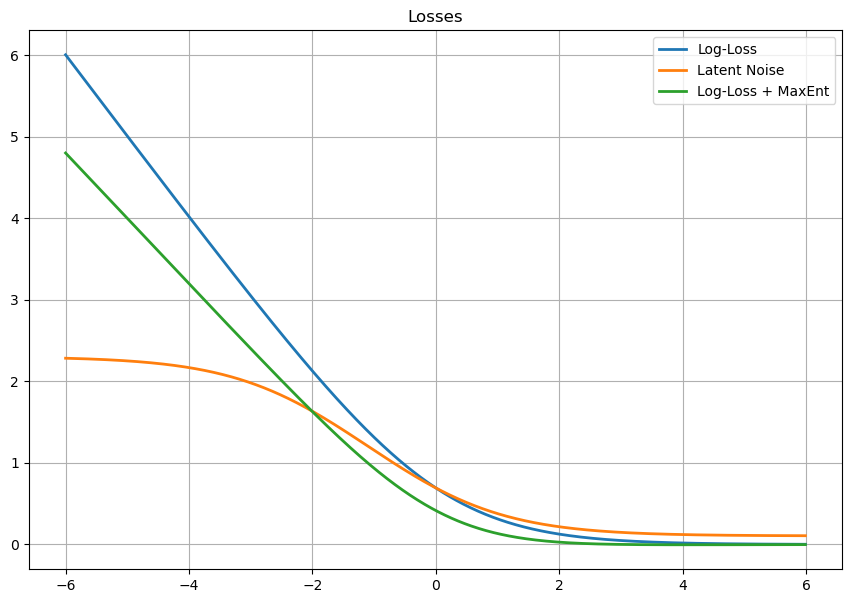

In [13]:
plotit(x, losses, ['Log-Loss', 'Latent Noise', 'Log-Loss + MaxEnt'], 'Losses')

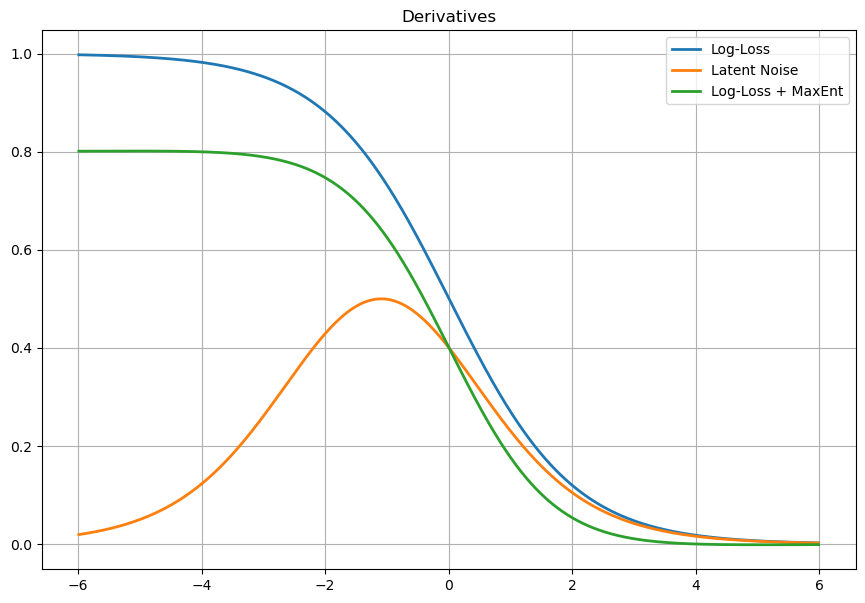

In [14]:
dx = x[1:] ; ex = x[1] - x[0]
divs = [-np.diff(l)/ex for l in losses]
plotit(dx, divs, ['Log-Loss', 'Latent Noise', 'Log-Loss + MaxEnt'], 'Derivatives')

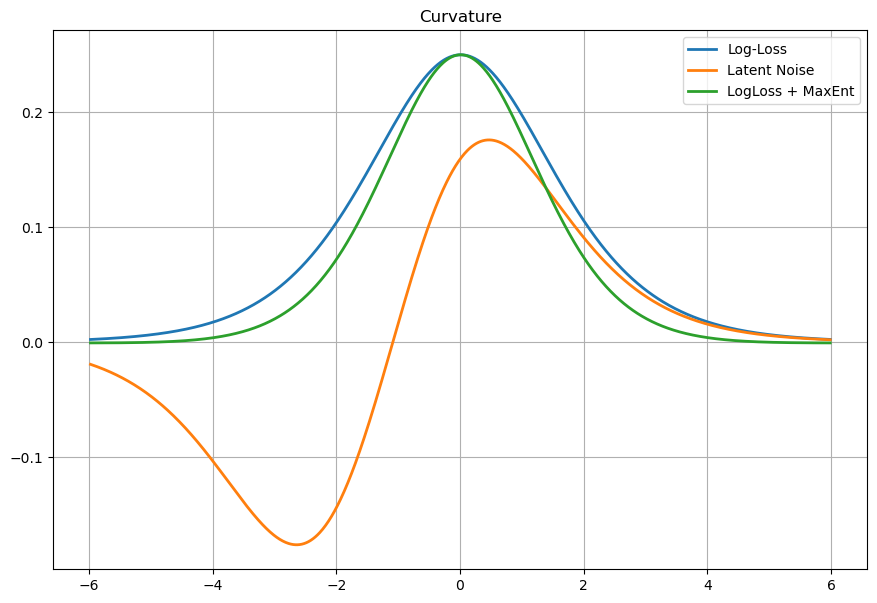

In [15]:
cx = x[2:]
curvs = [-np.diff(d)/ex for d in divs]
plotit(x[2:], curvs, ['Log-Loss', 'Latent Noise', 'LogLoss + MaxEnt'], 'Curvature')

In [16]:
KLdiv = lambda p, q : np.sum(p * np.log(p / q))
JSdiv = lambda p, q, s=0.5: s * KLDiv(p, s * p + (1-s) * q) + (1-s) * KLDiv(q, s * p + (1-s) * q)

In [17]:
k, r, n = 5, 6, 1000
x = np.arange(-r, r, 2*r/n)
Z = np.zeros((n, k))
Z[:,0] = x
P = np.exp(Z)
P = P / np.sum(P, axis=1, keepdims=True)
u = np.ones(k) / k

In [18]:
log_loss = -np.log(P[:,0])
ent = np.array([KLdiv(P[i,:], u) for i in range(n)])
reg = np.array([KLdiv(u, P[i,:]) for i in range(n)])
reg_loss = (1 - eps) * log_loss + eps * reg
ent_loss = (1 - eps) * log_loss + eps * ent
PE = (1 - eps) * P + eps / k
lat_loss = -np.log(PE[:,0])
losses = [log_loss, lat_loss, ent_loss]

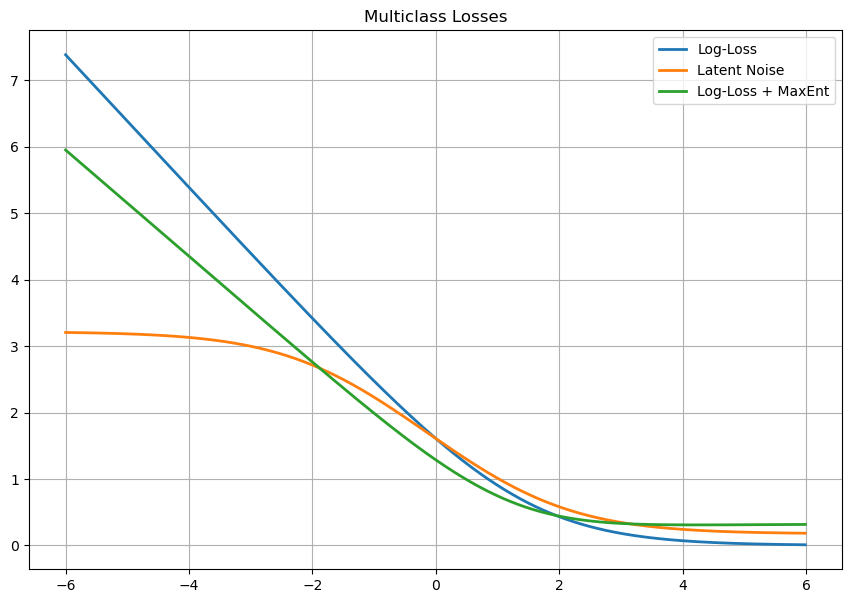

In [19]:
plotit(x, losses, ['Log-Loss', 'Latent Noise', 'Log-Loss + MaxEnt'], 'Multiclass Losses')

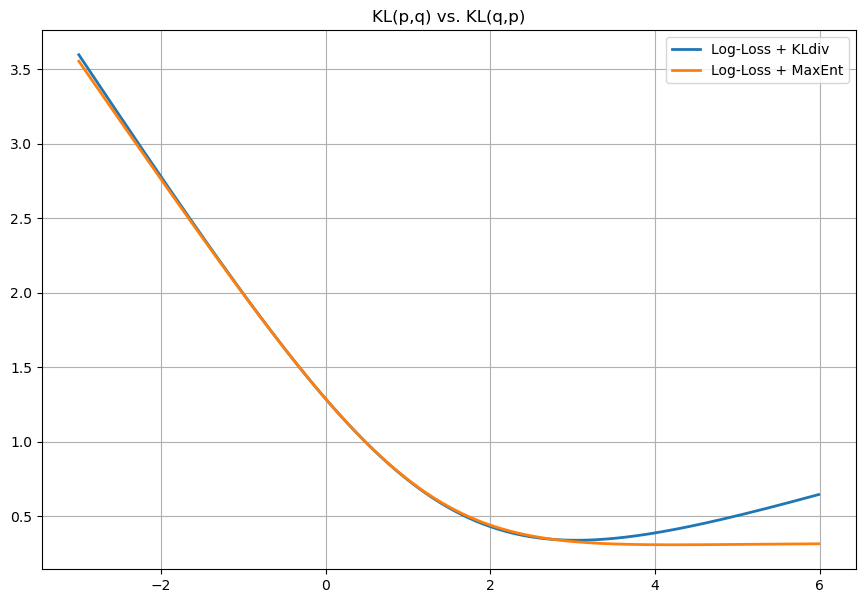

In [20]:
st = n // 4
plotit(x[st:], [reg_loss[st:], ent_loss[st:]], ['Log-Loss + KLdiv', 'Log-Loss + MaxEnt'], 'KL(p,q) vs. KL(q,p)')